# Basis eksempel - hente CSV fra SSBs Statistikkbank til Pandas


In [1]:
# Importerer Python Pandas for å kunne lage dataframe
import pandas as pd


API2 beta GET url med utformat csv. 

Merk de nye (foreløpig) udokumenterte parameterene for CSV output:

`&outputformat=csv&outputFormatParams=UseTexts&stub=NACE,Tid,ContentsCode`

In [2]:
url = "https://data.ssb.no/api/pxwebapi/v2-beta/tables/07129/data?lang=no&valueCodes[NACE]=47&valueCodes[ContentsCode]=VolumSesong&valueCodes[Tid]=top(13)&outputformat=csv&outputFormatParams=UseTexts&stub=NACE,Tid,ContentsCode"

pd.read_csv() henter innholdet fra API-et og legger det i data. 
De norske datasettene i csv2 er separert med komma og punktum som desimaltegn.
CSV er ikke UTF-8, så vi må angi parameter for encoding for å få ÆØÅ riktig. 

In [3]:
data = pd.read_csv(url, encoding = "ISO-8859-1")

Sjekker at datatypen er Pandas dataframe

In [4]:
type(data)

pandas.core.frame.DataFrame

Shape gir antall rader (13) og kolonner (4)

In [5]:
data.shape

(13, 4)

Toppen av datasettet. Verdikolonnen har tittelen på uttrekket.

In [6]:
data.head()

,næring,måned,statistikkvariabel,"07129: Varehandelsindeksen,"
0,"47 Detaljhandel, unntatt salg av motorvogner",2024M06,"Volumindeks, sesongjustert",91.7
1,"47 Detaljhandel, unntatt salg av motorvogner",2024M07,"Volumindeks, sesongjustert",92.0
2,"47 Detaljhandel, unntatt salg av motorvogner",2024M08,"Volumindeks, sesongjustert",92.4
3,"47 Detaljhandel, unntatt salg av motorvogner",2024M09,"Volumindeks, sesongjustert",92.2
4,"47 Detaljhandel, unntatt salg av motorvogner",2024M10,"Volumindeks, sesongjustert",92.6


Endrer til datoformat ved først å erstatte M med - . Ikke strengt nødvendig. Ta vekk kommentaren og kjør på nytt. Hva er endringen i figurene?

Informasjon om innholdet i dataframe

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   næring                       13 non-null     object 
 1   måned                        13 non-null     object 
 2   statistikkvariabel           13 non-null     object 
 3   07129: Varehandelsindeksen,  13 non-null     float64
dtypes: float64(1), object(3)
memory usage: 548.0+ bytes


In [8]:
print(data.columns)

Index(['næring', 'måned', 'statistikkvariabel', '07129: Varehandelsindeksen,'], dtype='object')


Setter tittel

In [9]:
tittel = data.columns[3] + ' ' + data['statistikkvariabel'].iloc[0] + ', ' + data['næring'].iloc[0] + ', ' + data['måned'].iloc[0] + '-' + data['måned'].iloc[-1]

Alternativ: ersatt M med - og sett tid. Kommenter ut cellen over og ta vekk kommentarene under

In [10]:
data['måned']= pd.to_datetime(data['måned'].str.replace('M', '-'))

In [11]:
tittel = data['næring'].iloc[0] + ', ' + data['statistikkvariabel'].iloc[0] + ', ' + data['måned'].iloc[0].strftime('%YM%m') + '-' + data['måned'].iloc[-1].strftime('%YM%m')
print(tittel)

47 Detaljhandel, unntatt salg av motorvogner, Volumindeks, sesongjustert, 2024M06-2025M06


Setter måned som index-kolonne

Lage et linjediagram der vi angir x og y aksen

<Axes: title={'center': '47 Detaljhandel, unntatt salg av motorvogner, Volumindeks, sesongjustert, 2024M06-2025M06'}, xlabel='måned'>

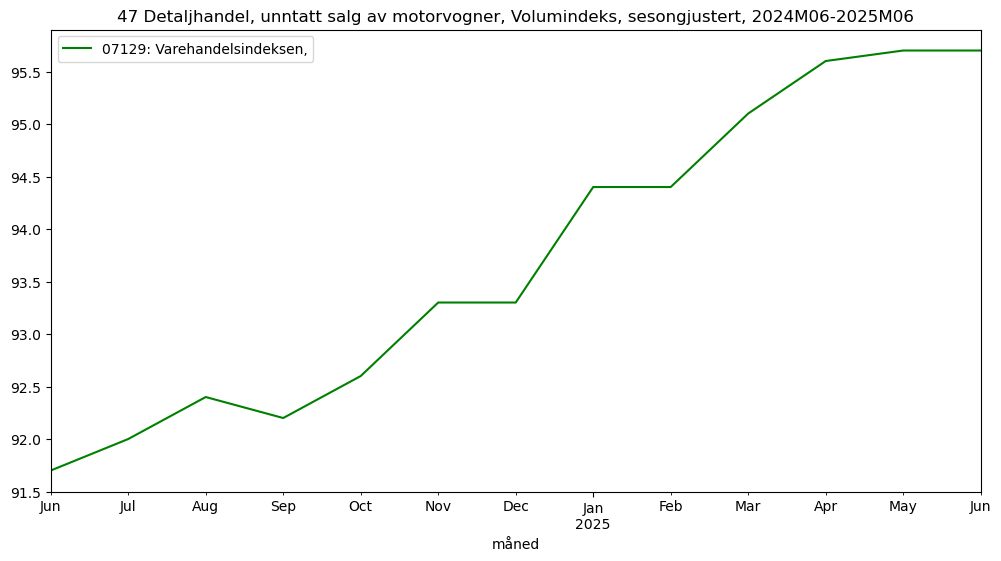

In [12]:
data.plot(x='måned', y='07129: Varehandelsindeksen,', figsize=(12, 6), color ='g', title = tittel)

*Alternativ*: Legger index (måned) og verdier  til et serie objekt, data_serie.

*Informasjon*: Fram til 2021 var dette en egen svært enkel indeks fra SSB, Detaljomsetningsindeksen. Den var fin for enkle eksempler. I 2022 ble Detaljomsetningindeksen utvidet med flere næringsgrupper (45 og 46) og detaljert med undergupper. Navnet på Statistikkbanktabellen ble endret til Varehandelsindeksen. Selve datasettet, 1066, er ikke endret.  